In [2]:
from fvecs import *
import numpy as np
candnum = ivecs_read("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/audio/candidate.ivecs")
candnum = candnum.flatten()
randnum = ivecs_read("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/candidate.ivecs")
randnum = randnum.flatten()
recalls = fvecs_read("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/sift/recalls_1000.fvecs")
recalls.shape

(1, 1000)

In [3]:
audio = np.empty_like(candnum)
audio[0] = candnum[0]
random = np.empty_like(candnum)
random[0] = randnum[0]
for i in range(1, candnum.size):
    audio[i] = candnum[i] - candnum[i-1]
    random[i] = randnum[i] - randnum[i-1]
audio = audio / 52587
random = random / 1e5 
audio, random

(array([0.02618518, 0.03434309, 0.03595946, ..., 0.02850514, 0.00787267,
        0.02369407]),
 array([0.02308, 0.05506, 0.04256, ..., 0.0115 , 0.03989, 0.03395]))

In [4]:
_, a99, _, r99 = np.quantile(audio, 0.1), np.quantile(audio, 0.99), np.quantile(random, 0.1), np.quantile(random, 0.99)
a99, r99

(0.06421796261433435, 0.11260050000000002)

In [5]:
am = audio.mean()
rm = random.mean()
al = 0.5 * am 
au = 1.5 * am 
rl = 0.5 * rm
ru = 1.5 * rm
ar = np.sum((al < audio) & (audio < au))/1e4
rr = np.sum((rl < random) & (random < ru))/1e4
al, rm, ar, rr

(0.009579506341871564, 0.031178877, 0.5343, 0.4222)

In [6]:
audio.std() / audio.mean() , random.std() / random.mean()

(0.7144502493883832, 0.8318351534238296)

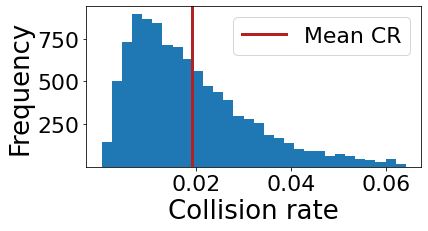

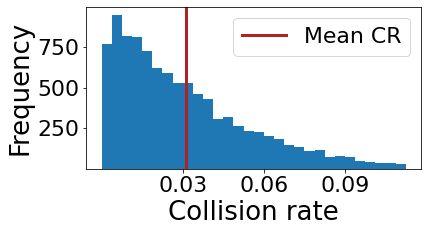

In [15]:
import matplotlib.pyplot as plt


def plot_hist(data, upper, mean, savepath, aratio, xticks):
    f = plt.figure()
    ax = plt.gca()
    params = {'legend.fontsize': 22,
            'axes.labelsize': 22,
            'axes.titlesize':22,
            'xtick.labelsize':22,
            'ytick.labelsize':22}
    plt.ticklabel_format(style='sci', axis='x', scilimits=(-3,3))

    plt.hist(data, range=[0, upper], bins=30, density=False)
    
    #ax.set_ylim((0, 0.8))
    #ax.plot(x_bins, mres[2], label="TRI")
    ax.set_xlabel("Collision rate",fontsize=26)
    ax.set_ylabel("Frequency",fontsize=26)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    plt.yticks([250, 500, 750])
    plt.xticks(xticks)
    plt.axvline(mean, color='firebrick', linewidth=3, label="Mean CR")
    plt.legend(loc="upper right",fontsize=22)
    ax.set_aspect(aratio)
    plt.savefig(savepath, bbox_inches="tight")

plot_hist(audio, a99, am, "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/plot2/audio_nncv2.pdf",
           0.000036, [0.02, 0.04, 0.06])
plot_hist(random, r99, rm, "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/plot2/random_nncv2.pdf", 0.00006,
          [0.03, 0.06, 0.09])

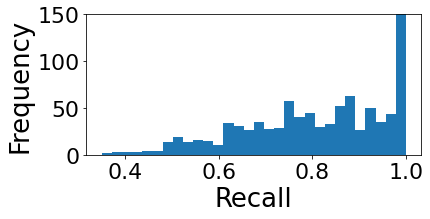

In [8]:
import matplotlib.pyplot as plt

def plot_hist2(data, upper, savepath):
    f = plt.figure()
    ax = plt.gca()
    params = {'legend.fontsize': 22,
            'axes.labelsize': 22,
            'axes.titlesize':22,
            'xtick.labelsize':22,
            'ytick.labelsize':22}
    plt.ticklabel_format(style='sci', axis='x', scilimits=(-3,3))

    plt.hist(data, range=[0.35, upper], bins=30, density=False)
    
    #ax.set_ylim((0, 0.8))
    #ax.plot(x_bins, mres[2], label="TRI")
    ax.set_xlabel("Recall",fontsize=26)
    ax.set_ylabel("Frequency",fontsize=26)
    ax.set_ylim((0, 150))
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    ax.set_aspect(0.002)

    plt.savefig(savepath, bbox_inches="tight")
plot_hist2(recalls[0], 1, "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/plot2/sift_recalls.pdf")

In [9]:
(np.count_nonzero(al<audio) - np.count_nonzero(au<audio))  / audio.size, (np.count_nonzero(rl<random) - np.count_nonzero(ru<random))  / audio.size

(0.5343, 0.4222)

In [10]:
from fvecs import *
def print_variance(name):
    candnum = ivecs_read("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/{}/candidate.ivecs".format(name))
    candnum = candnum.flatten()
    cand_table = np.empty_like(candnum)
    cand_table[0] = candnum[0]
    for i in range(1, candnum.size):
        cand_table[i] = candnum[i] - candnum[i-1]
    candmean = cand_table.mean()
    candstd = cand_table.std()
    ntables = (candstd / candmean * 19.6) ** 2
    return candmean, candstd, ntables, ntables * 4

for name in ["audio", "enron", "mnist", "trevi"]:
    xs = [round(x) for x in print_variance(name)]
    print("{}&{}&{}&{}\\\\".format(*xs))



1008&720&196&784\\
6010&4518&217&868\\
479&621&647&2587\\
4504&2123&85&341\\


In [11]:
qh_file = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/candn_qh.fvecs"
qh = fvecs_read(qh_file)[0]
qh = qh.reshape((10000, 9))
qh_norm = np.linalg.norm(qh, axis=1)
qh_norm.shape

(10000,)

In [12]:
plt.scatter(qh_norm, cand_table, s=1)

NameError: name 'cand_table' is not defined

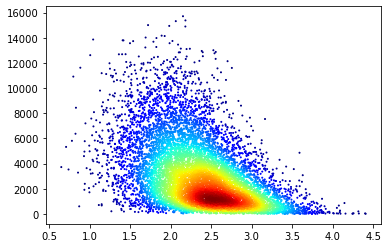

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

N = 10000
mean = [0,0]
cov = [[2,2],[0,2]]

stackvec = np.stack([qh_norm, cand_table])
densObj = kde( stackvec )

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( stackvec ) )

plt.scatter( qh_norm, cand_table, color=colours, s=1)
plt.show()